In [4]:
import os
import json

def get_data(folder_name):
    x = []
    y = []
    positions = []
    file_names = []

    for file in os.listdir(folder_name):
        if file.endswith(".txt"):
            file_name = os.path.join(folder_name, file[:-4])

            file_text = open(file_name + '.txt', encoding='utf8')
            try:
                file_truth = open(file_name + '.truth', encoding='utf8')

                try:
                    text = file_text.read()
                    truth = json.load(file_truth)
                    truth_changes = truth['changes']
                    truth_positions = truth['positions']

                    x.append(text)
                    y.append(truth_changes)
                    positions.append(truth_positions)
                    file_names.append(file[:-4])
                finally:
                    file_truth.close()
            finally:
                file_text.close()

    return x, y, positions, file_names

In [56]:
TRAINING_DIR = 'data/training'
train_x, train_y, positions, file_names = get_data(
        TRAINING_DIR)

In [57]:
VALIDATION_DIR = 'data/validation'
validation_x, validation_y, validation_positions, validation_file_names = get_data(
    VALIDATION_DIR
)

In [58]:
with_full_data_tfidf = True
clf = LightGbmWithLogReg()

train_x, train_y = train_x, train_y

In [66]:
max_features= 300000

print('Fitting w/ test...')
train_text = train_x

all_text = train_x

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),
    max_features=max_features
)

word_vectorizer.fit(all_text)

train_word_features = word_vectorizer.transform(train_text)


char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=max_features
)

char_vectorizer.fit(all_text)

train_char_features = char_vectorizer.transform(train_text)

feature_names = char_vectorizer.get_feature_names() + word_vectorizer.get_feature_names()
train_features = hstack([train_char_features, train_word_features])

Fitting w/ test...


In [67]:
logreg_model = LogisticRegression(C=2.0, solver='sag')

sfm = SelectFromModel(logreg_model, threshold=0.3)

train_target = np.array(train_y)
train_sparse_matrix = sfm.fit_transform(train_features, train_target)
print('Coef shape:', sfm.estimator_.coef_.shape)
print('Coef:', sfm.estimator_.coef_)

Coef shape: (1, 600000)
Coef: [[ 0.0992513   0.0992513   0.0992513  ...  0.03408639 -0.0104395
  -0.0104395 ]]


In [68]:
coef = sfm.estimator_.coef_.reshape(-1)

sorted_features = sorted(zip(map(lambda x: round(x, 4), coef), 
         feature_names), reverse=True)

In [69]:
best = [f for f in sorted_features if f[0]>=0.3]
len(best)

143

In [72]:
best_no_test

[(0.5934, 'e'),
 (0.5908, 'considered'),
 (0.5294, 'answers'),
 (0.514, '? '),
 (0.5088, 'questions'),
 (0.5029, 'i have'),
 (0.4842, 'individuals'),
 (0.483, 'at all'),
 (0.4719, 'class'),
 (0.4665, 'it for'),
 (0.4581, 'i e'),
 (0.4319, 'e "'),
 (0.4245, 'style'),
 (0.4228, 'g'),
 (0.4185, 'that doesn'),
 (0.4164, 'because the'),
 (0.416, 'since the'),
 (0.4057, 'reading'),
 (0.4057, '" '),
 (0.4019, 'soviet'),
 (0.4003, 'important'),
 (0.3984, 'to answer'),
 (0.3917, 'christianity'),
 (0.3916, 'fiction'),
 (0.3907, 'what are'),
 (0.3903, 'kantian'),
 (0.3902, 'pra'),
 (0.3894, 'contact'),
 (0.3874, 'that they'),
 (0.3874, 'i use'),
 (0.387, 'was that'),
 (0.387, 'then the'),
 (0.3856, 'germany'),
 (0.3831, ' “'),
 (0.3823, 'square'),
 (0.38, 'org'),
 (0.3788, ' "'),
 (0.3763, 'first time'),
 (0.374, 'game is'),
 (0.3731, 'onto the'),
 (0.3711, 'candidates'),
 (0.3701, 'prohibited'),
 (0.3668, 'power to'),
 (0.3663, 'public'),
 (0.363, 'als '),
 (0.3623, 'him in'),
 (0.3606, 'have th

In [65]:
best_with_test

[(0.5708, 'considered'),
 (0.5571, 'e'),
 (0.5168, 'answers'),
 (0.5089, '? '),
 (0.4888, 'questions'),
 (0.4836, 'i have'),
 (0.4816, 'individuals'),
 (0.4669, 'class'),
 (0.4655, 'at all'),
 (0.4535, 'it for'),
 (0.4344, 'e "'),
 (0.4336, 'i e'),
 (0.4171, 'that doesn'),
 (0.4163, 'style'),
 (0.4078, 'since the'),
 (0.4068, 'because the'),
 (0.4061, '" '),
 (0.4016, 'g'),
 (0.3919, 'i use'),
 (0.3896, 'reading'),
 (0.3896, 'kantian'),
 (0.3883, 'soviet'),
 (0.3882, 'what are'),
 (0.3855, 'to answer'),
 (0.385, 'pra'),
 (0.3837, 'then the'),
 (0.3801, 'christianity'),
 (0.3789, ' "'),
 (0.3783, 'was that'),
 (0.3754, ' “'),
 (0.3727, 'first time'),
 (0.372, 'fiction'),
 (0.3713, 'contact'),
 (0.3708, 'org'),
 (0.3692, 'game is'),
 (0.3675, 'important'),
 (0.3674, 'als '),
 (0.3667, 'germany'),
 (0.3665, 'that they'),
 (0.366, 'candidates'),
 (0.3644, 'onto the'),
 (0.3641, 'square'),
 (0.3608, 'deemed'),
 (0.3602, 'power to'),
 (0.3562, 'public'),
 (0.3556, 'that these'),
 (0.355, 'pr

In [79]:
best_with_test_list = [t[1] for t in best_with_test]
best_no_test_list = [t[1] for t in best_no_test]

In [81]:
set(best_with_test_list) - set(best_no_test_list)

{'fragments', 'of new', 'to other'}

In [82]:
set(best_no_test_list) - set(best_with_test_list)

{'.e',
 'almost',
 'are there',
 'his mother',
 'i am',
 'i ve',
 'in which',
 'least',
 'line',
 'nazi',
 'to what'}

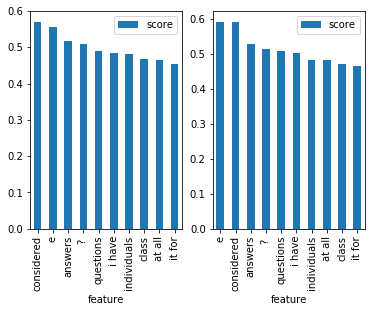

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

df = pd.DataFrame(best_with_test[:10], columns=['score', 'feature'])
df.plot(kind='bar', x='feature', ax=ax1)

df2 = pd.DataFrame(best_no_test[:10], columns=['score', 'feature'])
df2.plot(kind='bar', x='feature', ax=ax2)